In [ ]:
'''
Pandas는 Panel Datas의 약자로 파이썬을 이용한 데이타 분석에서 가장 많이 사용되는
라이브러리,
Numpy 를 기반으로 만들어졌으며 데이타분석을 위한 아주 효율적인 자료구조를 제공
1) Series -- 백터구조
2) DataFrame -- 메트릭스
3) Panel (우리의 대상이 아님)
::
우리가 앞으로 가져다 쓸 데이타는 거의다 이차원 배열구조이다.
테이블 형식의 데이타.... 엑셀

Q1. 왜 엑셀을 바로 가져다가 데이타 분석에 사용하지 않습니까?
1) 엑셀은 프로그램이 아니다
2) Numpy, Pandas, Matplot...에서 제공하는 라이브러리를 사용할 수 없다
    ----> Python 

'''

## Series
### 시리즈 생성, 구조확인

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


In [4]:
# 1. 시리즈생성
ser1 = Series?

In [18]:
#시리즈는 인덱스를 명시적으로 지정하지 않으면 자동으로 0-N-1 까지의 정수로 지정
#시리즈는 결론적으로 np배열이다.
#시리즈는 동일한 자료형만 담을수 있다.
np.random.seed(0)
ser1 = Series(np.random.randint(10,20,5), index=list('abcde'))
ser1
print(ser1.index)
print(ser1.values)
print(ser1.dtype)
ser1

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[15 10 13 13 17]
int32


a    15
b    10
c    13
d    13
e    17
dtype: int32

### 시리즈값 조회하기

In [20]:
'''
단일한 값, 여러값을 선택할 때
1) 인덱스로 지정 --- [1:4]    ----> 마지막 숫자를 포함안함
2) 라벨로 지정 --- ['a':'c']    ----> 마지막 문자를 포함
'''

ser1[1]
ser1['b']
print(ser1[1:4])
print(ser1['b':'d'])

b    10
c    13
d    13
dtype: int32
b    10
c    13
d    13
dtype: int32


### 응용해서 조회하기

In [28]:
ser1_1 = ser1[:]
print(ser1_1)

ser1_1 = ser1[::-1]
print(ser1_1)

ser1_1 = ser1[::2]
print(ser1_1)

'''
인덱스 a,c,e만 검색해서 출력하세요....

'''

ser1_1 = ser1[::2]
print(ser1_1)

a    15
b    10
c    13
d    13
e    17
dtype: int32
e    17
d    13
c    13
b    10
a    15
dtype: int32
a    15
c    13
e    17
dtype: int32
a    15
c    13
e    17
dtype: int32


### 시리즈간의 연산과 누락데이타 처리

In [31]:
print(ser1)
print(ser1_1)

#시리즈간의 연산
#인덱스가 없는 시리즈의 연산은 NaN출력 .... 누락데이타
result = ser1+ser1_1
print(result)

a    15
b    10
c    13
d    13
e    17
dtype: int32
a    15
c    13
e    17
dtype: int32
a    30.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64


In [40]:
#2. 누락데이타 조회하는 함수.... isnull() notnull()
print(result)
print(result.isnull()) #누락데이타 True
print('*'*40)
print(result.notnull()) # 누락아닌데이타
print('*'*40)
print(result.isnull().sum())
print('*'*40)
print(result[result.isnull()])
print('*'*40)
print(result[result.notnull()])

a    30.0
b     NaN
c    26.0
d     NaN
e    34.0
dtype: float64
a    False
b     True
c    False
d     True
e    False
dtype: bool
****************************************
a     True
b    False
c     True
d    False
e     True
dtype: bool
****************************************
2
****************************************
b   NaN
d   NaN
dtype: float64
****************************************
a    30.0
c    26.0
e    34.0
dtype: float64


### Series 값을 이용한 시각화

AxesSubplot(0.125,0.125;0.775x0.755)


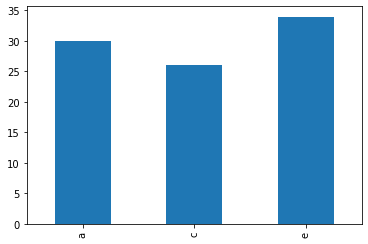

In [42]:
'''
위에서 했던 작업을 최종적으로 시각화
우리가 다뤘던 데이타 중에서 누락데이타를 제외한 데이타의 분포를 확인하는 그래프
'''

print(result[result.notnull()].plot(kind='bar'))
plt.show()

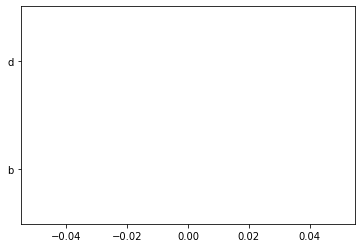

In [43]:
'''
no numeric data to plot  
'''
result[result.isnull()].plot(kind='barh')
plt.show()
